<div style="float: right"><img width=100px src="http://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/R_logo.svg/200px-R_logo.svg.png"></div>

<div style="float: left"><img width=100px src="https://upload.wikimedia.org/wikipedia/commons/c/c8/UF_Vertical_Signature.png"></div>

<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

<script>
  jQuery(document).ready(function($) {

  $(window).load(function(){
    $('#preloader').fadeOut('slow',function(){$(this).remove();});
  });

  });
</script>

<style type="text/css">
  div#preloader { position: fixed;
      left: 0;
      top: 0;
      z-index: 999;
      width: 100%;
      height: 100%;
      overflow: visible;
      background: #fff url('http://preloaders.net/preloaders/720/Moving%20line.gif') no-repeat center center;
  }

</style>

<div id="preloader"></div>

# Creating Functions in R

Abstracting your code into many small functions is key for writing nice R code. In our experience, users are initially reluctant to use functions in their code. Where people do use functions, they don’t use them enough, or try to make their functions do too much at once.

Functions can be very beneficial especially to automate processes you may plan to do routinely. For example: Say you need to download daily temperature readings for Gainesville, FL, convert them from fahreinheit to kelvin, summarise and average the temperature for the month and eventually plot the daily temperature for this month. To cut/paste script to do this every week would be drudgling boring and there is room for lots of errors. 

R has many built in functions, and you can access many more by installing new packages. So there’s no-doubt you already use functions. This guide will show how to write your own functions, and explain why this is helpful for writing nice R code.

## 1. Defining a Function

Functions are defined by code with a specific format:


`function.name <- function(arg1, arg2, arg3=2, ...) {
  newVar <- sin(arg1) + sin(arg2)  # do Some Useful Stuff
  newVar / arg3   # return value 
}`

<b>function.name</b>: is the function’s name. This can be any valid variable name, but you should avoid using names that are used elsewhere in R, such as dir, function, plot, etc.

<b>arg1, arg2, arg3</b>: these are the arguments of the function, also called formals. You can write a function with any number of arguments. These can be any R object: numbers, strings, arrays, data frames, of even pointers to other functions; anything that is needed for the function.name function to run.

Some arguments have default values specified, such as <b>arg3</b> in our example. Arguments without a default must have a value supplied for the function to run. You do not need to provide a value for those arguments with a default, as the function will use the default value.

<b>The ‘…’ argument</b>: The ..., or ellipsis, element in the function definition allows for other arguments to be passed into the function, and passed onto to another function. This technique is often in plotting, but has uses in many other places.

<b>Function body</b>: The function code between the within the {} brackets is run every time the function is called. This code might be very long or very short. Ideally functions are short and do just one thing – problems are rarely too small to benefit from some abstraction. Sometimes a large function is unavoidable, but usually these can be in turn constructed from a bunch of small functions. More on that below.

<b>Return value</b>: The last line of the code is the value that will be returned by the function. It is not necessary that a function return anything, for example a function that makes a plot might not return anything, whereas a function that does a mathematical operation might return a number, or a list.

## 2. Writing a Function

Writing functions is simple.

The procedure for writing any other functions is similar, involving three key steps:

1. Define the function,
2. Load the function into the R session,
3. Use the function.

Let's write a function that will sum up the squares of two variables

In [2]:
sum.of.squares <- function(x,y) {
  x^2 + y^2
}

In [4]:
sum.of.squares(x=2,y=3)

[1] 13

You have now created a function called `sum.of.squares` which requires <b>two arguments</b> and returns the sum of the squares of these arguments. Since you ran the code through the console, the function is now available, like any of the other built-in functions within R. Running sum.of.squares(3,4) will give you the answer 25 - give it a try!

### Load the function into the R session

For R to be able to execute your function, it needs first to be read into memory. This is just like loading a library, until you do it the functions contained within it cannot be called.

There are two methods for loading functions into the memory:

1. Copy the function text and paste it into the console
2. Use the `source()` function to load your functions from file - this requires you to have a separate R script with just your functions that you can call into R when you need to use them (i.e. load them into R).

For the purpose of this exercise we will simply write the functions and run them directly into the console instead of sourcing them.

Excercise:

Let's create a function that would convert Fahrenheit to Kelvin, call it `F_to_Kelvin`:

Hint: the formula to convert:

$$((F - 32)\times(5/9))+273.15$$ 
where F is the Fahrenheit temperature

In [5]:
F_to_Kelvin <- function(temp){
    kelvin <- ((temp-32)*(5/9))+273.15
    return(kelvin)
}

In [7]:
#e.g. freezing point of water
F_to_Kelvin(32)

[1] 273.15

### Using your function

You can now use the function anywhere in your analysis. In thinking about how you use functions, consider the following:

1. Functions in R can be treated much like any other R object.
2. Functions can be passed as arguments to other functions or returned from other functions.
3. You can define a function inside of another function.

Now say we are interested in also checking what the temperature is in Celsius for other experiments. We can also create a function that converts Kelvin to Celsius:

In [9]:
Kelvin_to_C <- function(temp){
    celsius <- temp - 273.15
    return(celsius)
}

Kelvin_to_C(0)

[1] -273.15

We can also include a function inside another function! take for example, we want to now convert Fahrenheit to Celsius:

In [12]:
F_to_C <- function(temp){
    temp_kelvin <- F_to_Kelvin(temp)
    final_Celsius <- Kelvin_to_C(temp_kelvin)
    return(final_Celsius)
}

F_to_C(32)

[1] 0

So far we have had a taster of pretty simple functons. We have been able to combine functions to make other simple functions that can be later used. Majority of the time, we don't want to make overcomplicated functions but they can get larger (maybe a dozen more lines or so). Let's go ahead and try use functions to make life simpler with our weather data.

In [17]:
#Bring in the data
download.file('http://www.r-gators.com/weatherDaily.csv', 'weatherDaily.csv')
weather <- read.csv("weatherDaily.csv")
head(weather)  #let's check what the data looks like (in case we forgot)

YEAR,MONTH,DAY,TEMP,PRECIP,SEASON
1984,1,1,41.0,0,Winter
1984,1,2,48.5,0,Winter
1984,1,3,48.0,0,Winter
1984,1,4,50.0,0,Winter
1984,1,5,53.0,0,Winter
1984,1,6,53.0,0,Winter


Now remember we have made a couple of simple functions that deal with temperature. We can apply these functions now to create new columns in the dataframe. Let's make a column of temperature in celcius (I certainly find it more intuitive to think in celsius).

In [31]:
#load packages tidyverse
#NOTE: if you don't have tidyverse, please install it using the code below:
#install.packages('tidyverse')
library('tidyverse')
weather  %>% 
mutate(TEMP_C=F_to_C(TEMP)) %>% 
head()

YEAR,MONTH,DAY,TEMP,PRECIP,SEASON,TEMP_C
1984,1,1,41.0,0,Winter,5.00
1984,1,2,48.5,0,Winter,9.17
1984,1,3,48.0,0,Winter,8.89
1984,1,4,50.0,0,Winter,10.00
1984,1,5,53.0,0,Winter,11.67
1984,1,6,53.0,0,Winter,11.67


Notice that we can use functions inside tools such as dplyr to manipulate data. However, i'm not entirely satisfied with my function `F_to_C` as it gives me lots of decimal point values. How about we tweak the function by rounding the output to 2 decimal places:

Excercise:
 Re-do the `F_to_C` function by rounding the output to 2 decimal places. HINT: to round we can use the function `round()` in R.

In [30]:
F_to_C <- function(temp){
    temp_kelvin <- F_to_Kelvin(temp)
    final_Celsius <- Kelvin_to_C(temp_kelvin)
    final_Celsius <- round(final_Celsius, 2)  #added to round the values to 2 d.p
    return(final_Celsius)
}

#test the function
F_to_C(100)

[1] 37.78

NOTE: when we re run this function we will overwrite the previous `F_to_C` function we orginally created.

now if we run the dplyr code again we should get values up to 2 d.p

Functions can also be used to make plots that you know you might use over and over again. Say we know we want to plot average temperature by month and year with its confidence interval so that everytime we get a new month of data, we can simply apply this function to make the plot.

1. Let's create a function that take in day, month and year and will make us a Date. We want this to be flexible such that if we don't have a day, it will make month-year format.

In [47]:
#function to create dates
create_date <- function(data, day=NULL, month, year){
  if(is.null(day)){
    date=as.Date(with(data,paste(year, month,1,sep="-")), "%Y-%m-%d")  #note: as.Date requires "day" so if we want just month we still need to input day
    return(date)
  }else{
    date=as.Date(with(data, paste(year, month, day,sep="-")), "%Y-%m-%d")
    return(date)
  }
}

#let's test this function
create_date(data=weather, day=1,month=12, year=2011)

[1] "2011-12-01"

Next we want to use this date to plot the average temperature by date

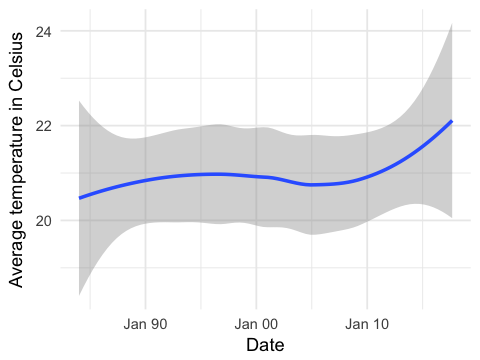

In [65]:
#Let's break this down, we first want to aggregate this data by month and year to get mean temperature
weather %>%
  mutate(TEMP_C=F_to_C(TEMP)) %>% 
  mutate(Date=create_date(weather,month=MONTH, year=YEAR)) %>% 
  group_by(Date) %>% 
  summarise(av_TEMP_C=mean(TEMP_C,2, na.rm=T)) %>% 
  ggplot(aes(x=Date, y=av_TEMP_C))+
  geom_smooth(method='loess') +
  scale_x_date(date_labels ="%b %y")+
  ylab("Average temperature in Celsius")+
  theme_minimal()

So how do we convert this into a function?

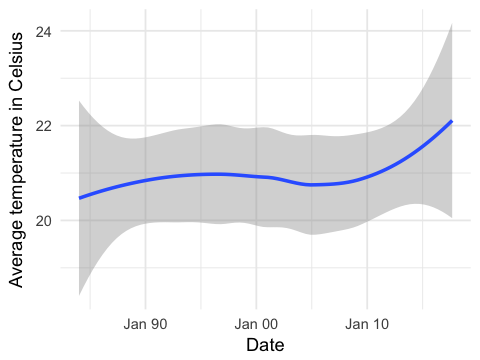

In [64]:
ploting_avg_temp_C=function(data,...){
  data %>%
    mutate(TEMP_C=F_to_C(TEMP)) %>% 
    mutate(Date=create_date(weather,month=MONTH, year=YEAR)) %>% 
    group_by(Date) %>% 
    summarise(av_TEMP_C=mean(TEMP_C,2, na.rm=T)) %>% 
    ggplot(aes(x=Date, y=av_TEMP_C))+
    geom_smooth(method='loess') +
    scale_x_date(date_labels ="%b %y")+
    ylab("Average temperature in Celsius")+
    theme_minimal()
}

ploting_avg_temp_C(weather)

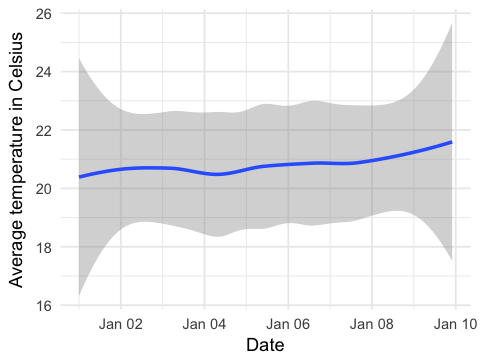

In [67]:
#so we can subet the data and then try plot temperatures between 2000 and 2010
weather1=weather[weather$YEAR >2000 & weather$YEAR<2010,]
ploting_avg_temp_C(weather1)

Excercise: Create a plot function for average precipitation with it's confidence intervals.

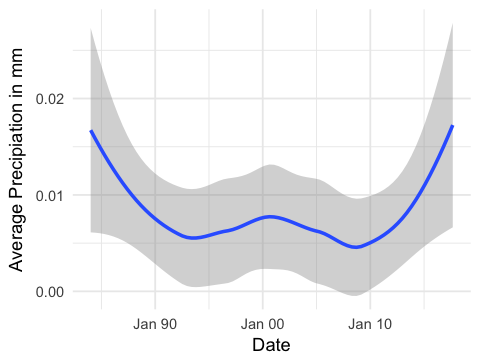

In [68]:
ploting_avg_precip=function(data,...){
  data %>%
    mutate(Date=create_date(weather,month=MONTH, year=YEAR)) %>% 
    group_by(Date) %>% 
    summarise(av_precip=mean(PRECIP,2, na.rm=T)) %>% 
    ggplot(aes(x=Date, y=av_precip))+
    geom_smooth(method='loess') +
    scale_x_date(date_labels ="%b %y")+
    ylab("Average Precipiation in mm")+
    theme_minimal()
}

ploting_avg_precip(weather)

Excercise: Make a plot for temperature in Celsius but this time by year only

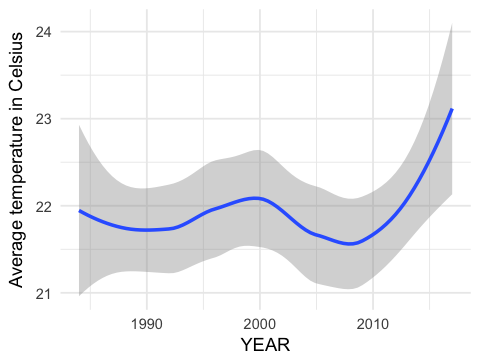

In [71]:
ploting_avg_temp_C_year=function(data,...){
  data %>%
    mutate(TEMP_C=F_to_C(TEMP)) %>% 
    group_by(YEAR) %>% 
    summarise(av_TEMP_C=mean(TEMP_C,2, na.rm=T)) %>% 
    ggplot(aes(x=YEAR, y=av_TEMP_C))+
    geom_smooth(method='loess') +
    ylab("Average temperature in Celsius")+
    theme_minimal()
}

ploting_avg_temp_C_year(weather)

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter, delivered by Fastly, rendered by Rackspace.
</footer>